In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.collections import LineCollection


In [80]:
PRED = 0
OMNI = 1
PREY = 2
colors = ["#fb8500", "#DC267F", "#648FFF"]

plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams["figure.figsize"] = (6.5,4)
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["legend.loc"] = "upper left"


_alpha=.85


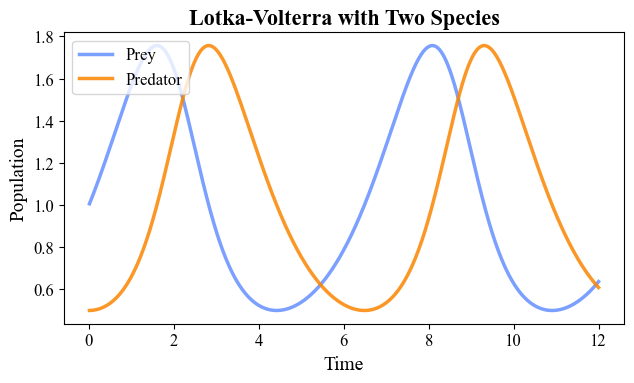

In [81]:
# original

from scipy.integrate import RK45

alpha = 1
beta = 1
gamma = 1
delta = 1

dP = lambda P, Q: P * (alpha - beta * Q)
dQ = lambda P, Q: Q * (delta * P - gamma)

f = lambda t, y: np.array([dP(*y), dQ(*y)])

solver = RK45(
    f,
    0,
    np.array([1, 1/2]),
    12, 
    vectorized=True, 
    max_step=12 / 1000
)

sol = []
T = []
while solver.status == 'running':
    solver.step()
    sol.append(solver.y)
    T.append(solver.t)
sol = np.array(sol)

P = sol[:, 0]
Q = sol[:, 1]

plt.plot(T, P, color=colors[PREY], label="Prey", alpha=_alpha)
plt.plot(T, Q, color=colors[PRED], label="Predator", alpha=_alpha)
plt.legend()
plt.title("Lotka-Volterra with Two Species")
plt.xlabel("Time")
plt.ylabel("Population")
plt.tight_layout()
plt.savefig("populations/two_species.pdf")


/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/109872818.py:14: RuntimeWarning: invalid value encountered in divide
  plt.quiver(P, Q, x_dir / scale, y_dir / scale, scale=None, width=.0045)


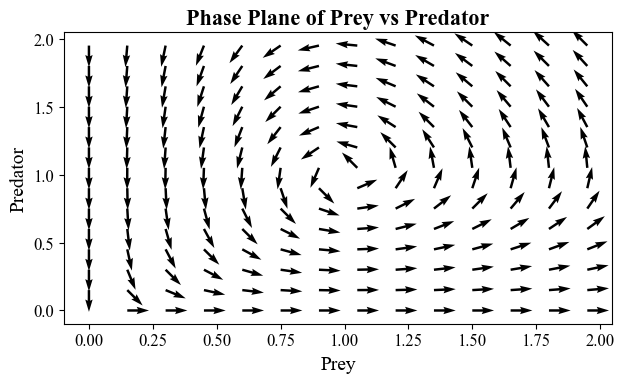

In [82]:
# original vector field
P, Q = np.meshgrid(grid := np.arange(0, 2, .15), grid)
grad = []
for pp, qq in zip(P, Q):
    
    grad.append([dP(pp, qq), dQ(pp, qq)])
grad = np.array(grad)

x_dir = grad[:, 0, :]
y_dir = grad[:, 1, :]

scale = np.sqrt(x_dir ** 2 + y_dir ** 2)

plt.quiver(P, Q, x_dir / scale, y_dir / scale, scale=None, width=.0045)
plt.title("Phase Plane of Prey vs Predator")
plt.xlabel("Prey")
plt.ylabel("Predator")
plt.tight_layout()

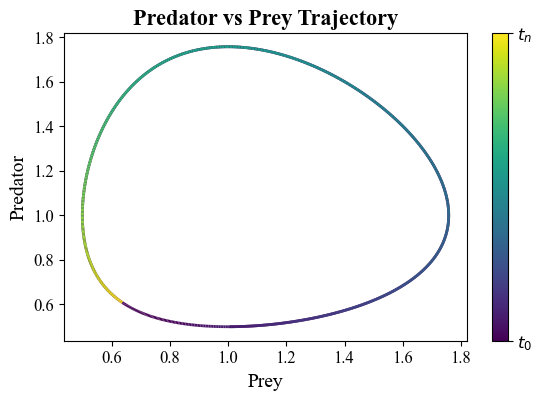

In [83]:
t = np.linspace(0, 12, sol.shape[0])

# Create line segments
points = np.array([sol[:, 0], sol[:, 1]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection from the segments and apply a colormap
lc = LineCollection(segments, cmap='viridis', norm=plt.Normalize(6, 12))
lc.set_array(t)
lc.set_linewidth(2)

# Create the plot
fig, ax = plt.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.set_title("Predator vs Prey Trajectory")
ax.set_xlabel("Prey")
ax.set_ylabel("Predator")

# Add colorbar
cbar = fig.colorbar(lc, ax=ax)
cbar.set_ticks([6, 12])
cbar.set_ticklabels(["$t_0$", "$t_n$"])

# Save the plot to a file
plt.savefig("trajectories/two_species.pdf")

# Show the plot (optional)
plt.show()


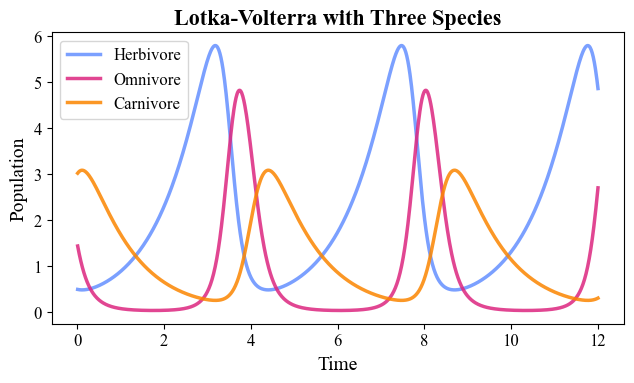

In [84]:
# 3 species

from scipy.integrate import RK45

alpha = 1
beta = 1
gamma = 1
delta = 1
epsilon = 1
zeta = 1
eta = 1

dX = lambda X, Y, Z: alpha * X - beta * X * Y
dY = lambda X, Y, Z: -gamma * Y + delta * X * Y - epsilon * Y * Z 
dZ = lambda X, Y, Z: -zeta * Z + eta * Y * Z


f = lambda t, y: np.array([dX(*y), dY(*y), dZ(*y)])

solver = RK45(
    f,
    0,
    np.array([.5, 1.5, 3]),
    12, 
    vectorized=True, 
    max_step=12 / 1000
)

sol = []
T = []
while solver.status == 'running':
    solver.step()
    sol.append(solver.y)
    T.append(solver.t)
sol = np.array(sol)

X = sol[:, 0]
Y = sol[:, 1]
Z = sol[:, 2]

plt.plot(T, X, color=colors[PREY], label="Herbivore", alpha=_alpha)
plt.plot(T, Y, color=colors[OMNI], label="Omnivore", alpha=_alpha)
plt.plot(T, Z, color=colors[PRED], label="Carnivore", alpha=_alpha)
plt.legend()
plt.title("Lotka-Volterra with Three Species")
plt.xlabel("Time")
plt.ylabel("Population")
plt.tight_layout()
plt.savefig("populations/three_species.pdf")



/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/2912808120.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


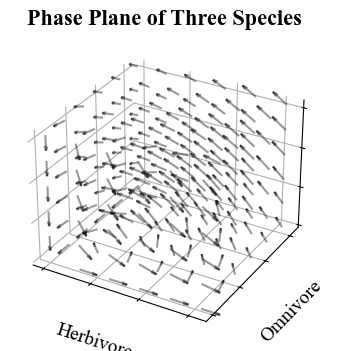

In [85]:
# 3 species vector field
ax = plt.figure().add_subplot(projection='3d')

X, Y, Z = np.meshgrid(grid := np.arange(0, 7, 1.25), grid, grid)
grad = []
for pp, qq, rr in zip(X, Y, Z):
    grad.append([dX(pp, qq, rr), dY(pp, qq, rr), dZ(pp, qq, rr)])
grad = np.array(grad)

x_dir = grad[:, 0, :]
y_dir = grad[:, 1, :]
z_dir = grad[:, 2, :]

x_scale=1
y_scale=1
z_scale=1

from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([x_scale, y_scale, z_scale, 1]))

scale = np.sqrt(x_dir ** 2 + y_dir ** 2 + z_dir ** 2)

ax.quiver(X, Y, Z, x_dir, y_dir, z_dir, normalize=True, linewidths=1.5, colors=to_rgba("black", .4), length=.75)
ax.set_title("Phase Plane of Three Species")
ax.set_xlabel("Herbivore")
ax.set_ylabel("Omnivore")
ax.set_zlabel("Carnivore")

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


plt.tight_layout()

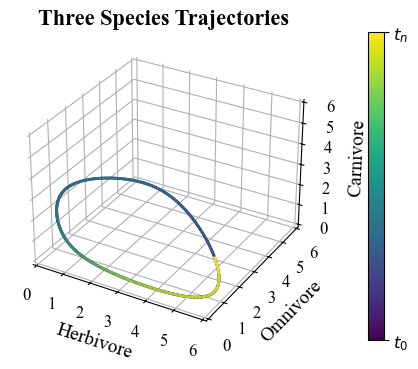

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.colors import Normalize

# Create a linearly spaced array for the color gradient
t = np.linspace(0, 12, sol.shape[0])

# Create line segments
segments = []
for i in range(0, sol.shape[0] - 1):
    segments.append(np.array([sol[i], sol[i + 1]]))


# Create a normalization instance
norm = Normalize(6, 12)

# Create a Line3DCollection from the segments and apply a colormap
lc = Line3DCollection(segments, cmap='viridis', norm=norm)
lc.set_array(t)
lc.set_linewidth(2)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.add_collection(lc)
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.set_zlim(0, 6)
ax.set_title("Three Species Trajectories")
ax.set_xlabel("Herbivore")
ax.set_ylabel("Omnivore")
ax.set_zlabel("Carnivore")

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Add colorbar
cbar = fig.colorbar(lc, ax=ax, pad=0.1)
cbar.set_ticks([6, 12])
cbar.set_ticklabels(["$t_0$", "$t_n$"])

# Save the plot to a file
plt.savefig("trajectories/three_species.pdf")



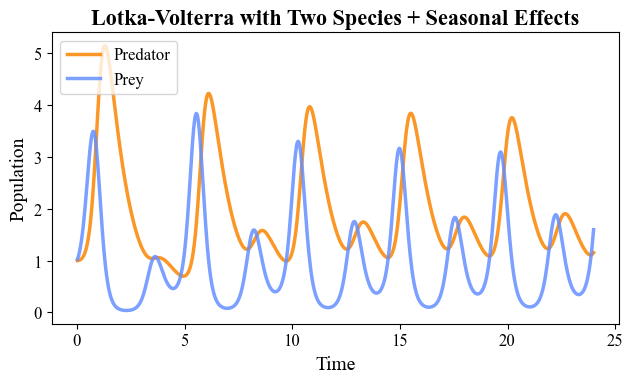

In [96]:
# seasonal

from scipy.integrate import RK45

alpha = 1
beta = .8
gamma = 1
delta = 1
r = 5.5
w = 2 * np.pi /  np.sqrt(r)


dQ = lambda P, Q: alpha * Q * P - delta * Q # predator
dP = lambda P, Q, t: (r * ((1 + np.sin(t * w)) / 2) * P) - (beta * P ** 2) - (gamma * Q * P) # prey

f = lambda t, y: np.array([dP(*y, t), dQ(*y)])

solver = RK45(
    f,
    0,
    np.array([1, 1]),
    24, 
    vectorized=True, 
    max_step=24 / 1000
)

sol = []
T = []
while solver.status == 'running':
    solver.step()
    sol.append(solver.y)
    T.append(solver.t)
sol = np.array(sol)

P = sol[:, 0]
Q = sol[:, 1]

plt.plot(T, Q, color=colors[PRED], label="Predator", alpha=_alpha)
plt.plot(T, P, color=colors[PREY], label="Prey", alpha=_alpha)
plt.legend()
plt.title("Lotka-Volterra with Two Species + Seasonal Effects")
plt.xlabel("Time")
plt.ylabel("Population")
plt.tight_layout()
plt.savefig("populations/two_species_seasonal.pdf")



In [95]:
# two species + time vector field
for i, t in enumerate(np.arange(0, 26, 2.5)):
    P, Q = np.meshgrid(grid := np.arange(0, 5, .3), grid)
    grad = []
    for pp, qq in zip(P, Q):
        grad.append([dP(pp, qq, t), dQ(pp, qq)])
    grad = np.array(grad)

    x_dir = grad[:, 0, :]
    y_dir = grad[:, 1, :]

    scale = np.sqrt(x_dir ** 2 + y_dir ** 2)

    plt.quiver(P, Q, x_dir / scale, y_dir / scale, scale=None, width=.0045)


    plt.xlabel("Prey")
    plt.ylabel("Predator")
    plt.title(f"$t = {t}$") 
    plt.tight_layout()

    plt.savefig(f"vector-fields/two_species_seasonal_t={t}.pdf")
    plt.clf()

/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/1112961597.py:14: RuntimeWarning: invalid value encountered in divide
  plt.quiver(P, Q, x_dir / scale, y_dir / scale, scale=None, width=.0045)
/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/1112961597.py:14: RuntimeWarning: invalid value encountered in divide
  plt.quiver(P, Q, x_dir / scale, y_dir / scale, scale=None, width=.0045)
/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/1112961597.py:14: RuntimeWarning: invalid value encountered in divide
  plt.quiver(P, Q, x_dir / scale, y_dir / scale, scale=None, width=.0045)
/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/1112961597.py:14: RuntimeWarning: invalid value encountered in divide
  plt.quiver(P, Q, x_dir / scale, y_dir / scale, scale=None, width=.0045)
/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/1112961597.py:14: RuntimeWarning: invalid value encountered in divide
  plt.quiver(P, Q, x_dir / scale, 

<Figure size 650x400 with 0 Axes>

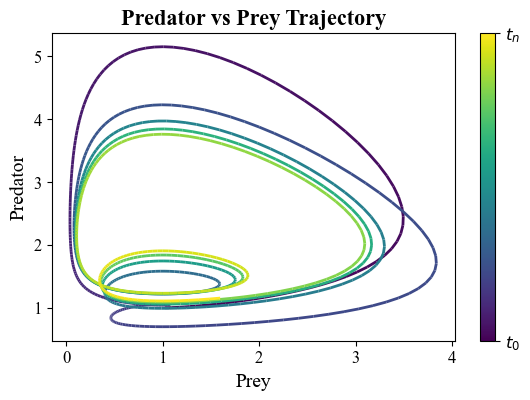

In [97]:
t = np.linspace(0, 12, sol.shape[0])

# Create line segments
points = np.array([sol[:, 0], sol[:, 1]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection from the segments and apply a colormap
lc = LineCollection(segments, cmap='viridis', norm=plt.Normalize(0, 12))
lc.set_array(t)
lc.set_linewidth(2)

# Create the plot
fig, ax = plt.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.set_title("Predator vs Prey Trajectory")
ax.set_xlabel("Prey")
ax.set_ylabel("Predator")

# Add colorbar
cbar = fig.colorbar(lc, ax=ax)
cbar.set_ticks([0, 12])
cbar.set_ticklabels(["$t_0$", "$t_n$"])

# Save the plot to a file
plt.savefig("trajectories/two_species_seasonal.pdf")

# Show the plot (optional)
plt.show()

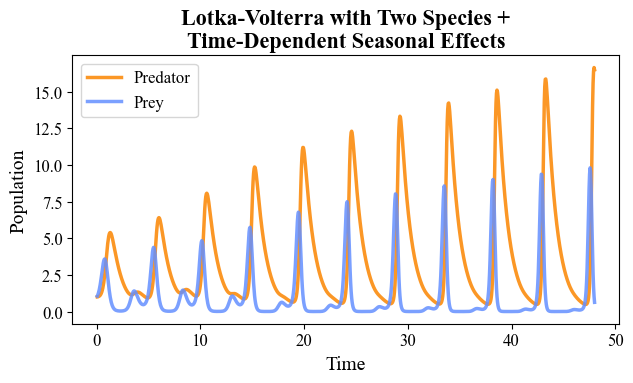

In [99]:
# 2 species + seasonal + climate change
# seasonal

from scipy.integrate import RK45

alpha = 1
beta = .8
gamma = 1
delta = 1
r = 5.5
w = 2 * np.pi /  np.sqrt(r)


g = lambda t: np.log(t / 10 + np.e)

dPred = lambda prey, pred: alpha * pred * prey - delta * pred
dPrey = lambda prey, pred, t: (r * (g(t)*(1 + np.sin(t * w)) / 2) * prey) - (beta * prey ** 2) - (gamma * prey * pred)

f = lambda t, y: np.array([dPrey(*y, t), dPred(*y)])

solver = RK45(
    f,
    0,
    np.array([1, 1]),
    48, 
    vectorized=True, 
    max_step=48 / 1000
)

sol = []
T = []
while solver.status == 'running':
    solver.step()
    sol.append(solver.y)
    T.append(solver.t)
sol = np.array(sol)

prey = sol[:, 0]
pred = sol[:, 1]

plt.plot(T, pred, color=colors[PRED], label="Predator", alpha=_alpha)
plt.plot(T, prey, color=colors[PREY], label="Prey", alpha=_alpha)
plt.legend()
plt.title("Lotka-Volterra with Two Species +\nTime-Dependent Seasonal Effects")
plt.xlabel("Time")
plt.ylabel("Population")
plt.tight_layout()
plt.savefig("populations/two_species_seasonal_cc.pdf")



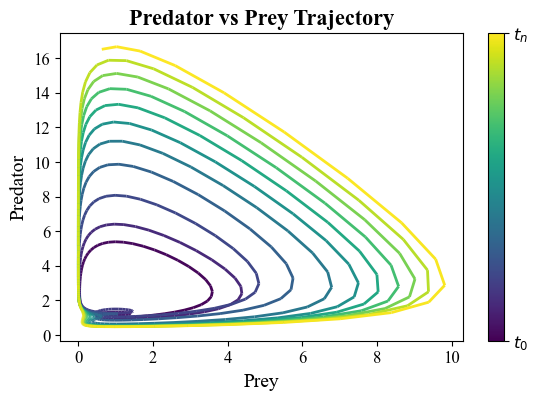

In [100]:
t = np.linspace(0, 48, sol.shape[0])

# Create line segments
points = np.array([sol[:, 0], sol[:, 1]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection from the segments and apply a colormap
lc = LineCollection(segments, cmap='viridis', norm=plt.Normalize(0, 48))
lc.set_array(t)
lc.set_linewidth(2)

# Create the plot
fig, ax = plt.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.set_title("Predator vs Prey Trajectory")
ax.set_xlabel("Prey")
ax.set_ylabel("Predator")

# Add colorbar
cbar = fig.colorbar(lc, ax=ax)
cbar.set_ticks([0, 48])
cbar.set_ticklabels(["$t_0$", "$t_n$"])

# Save the plot to a file
plt.savefig("trajectories/two_species_seasonal_cc.pdf")


In [102]:
# two specie + time + CC vector field
for i, t in enumerate(np.arange(0, 26, 2.5)):
    P, Q = np.meshgrid(grid := np.arange(0, 5, .3), grid)
    grad = []
    for pp, qq in zip(P, Q):
        grad.append([dPrey(pp, qq, t), dPred(pp, qq)])
    grad = np.array(grad)

    x_dir = grad[:, 0, :]
    y_dir = grad[:, 1, :]

    scale = np.sqrt(x_dir ** 2 + y_dir ** 2)

    plt.quiver(P, Q, x_dir / scale, y_dir / scale, scale=None, width=.0045)


    plt.xlabel("Prey")
    plt.ylabel("Predator")
    plt.title(f"$t = {t}$") 
    plt.tight_layout()

    plt.savefig(f"vector-fields/two_species_seasonal_withCC_t={t}.pdf")
    plt.clf()

/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/3406120883.py:14: RuntimeWarning: invalid value encountered in divide
  plt.quiver(P, Q, x_dir / scale, y_dir / scale, scale=None, width=.0045)
/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/3406120883.py:14: RuntimeWarning: invalid value encountered in divide
  plt.quiver(P, Q, x_dir / scale, y_dir / scale, scale=None, width=.0045)
/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/3406120883.py:14: RuntimeWarning: invalid value encountered in divide
  plt.quiver(P, Q, x_dir / scale, y_dir / scale, scale=None, width=.0045)
/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/3406120883.py:14: RuntimeWarning: invalid value encountered in divide
  plt.quiver(P, Q, x_dir / scale, y_dir / scale, scale=None, width=.0045)
/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/3406120883.py:14: RuntimeWarning: invalid value encountered in divide
  plt.quiver(P, Q, x_dir / scale, 

<Figure size 650x400 with 0 Axes>

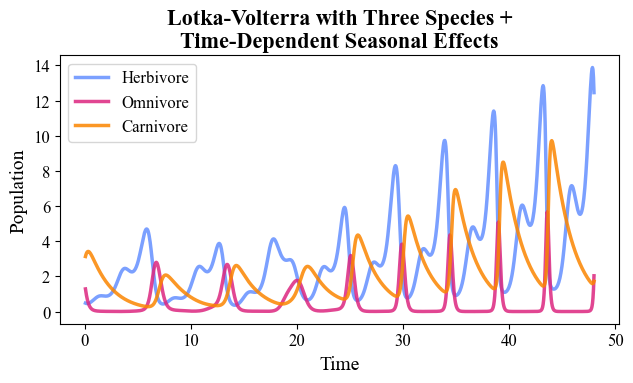

In [66]:
# 3 species + climate change

from scipy.integrate import RK45

alpha = 1
beta = 1
gamma = 1
delta = 1
epsilon = 1
zeta = .5
eta = 1
theta = .8

r = 5.5
w = 2 * np.pi /  np.sqrt(r)
g = lambda t: np.log(t / 10 + np.e)
s = lambda t: (g(t)*(1 + np.sin(t * w)) / 2)

dX = lambda X, Y, Z, t: s(t) * alpha * X  - .1 * (theta * X ** 2) - beta * X * Y
dY = lambda X, Y, Z, t: s(t) * -gamma * Y - .1 * (theta * Y ** 2) + delta * X * Y - epsilon * Y * Z 
dZ = lambda X, Y, Z: -zeta * Z + eta * Y * Z 


f = lambda t, y: np.array([dX(*y, t), dY(*y, t), dZ(*y)])

solver = RK45(
    f,
    0,
    np.array([.5, 1.5, 3]),
    48,
    vectorized=True, 
    max_step=48 / 1000
)

sol = []
T = []
while solver.status == 'running':
    solver.step()
    sol.append(solver.y)
    T.append(solver.t)
sol = np.array(sol)

X = sol[:, 0]
Y = sol[:, 1]
Z = sol[:, 2]

plt.plot(T, X, color=colors[PREY], label="Herbivore", alpha=_alpha)
plt.plot(T, Y, color=colors[OMNI], label="Omnivore", alpha=_alpha)
plt.plot(T, Z, color=colors[PRED], label="Carnivore", alpha=_alpha)
plt.legend()
plt.title("Lotka-Volterra with Three Species +\nTime-Dependent Seasonal Effects")
plt.xlabel("Time")
plt.ylabel("Population")
plt.tight_layout()
plt.savefig("populations/thre_species_seasonal_cc.pdf")


In [67]:
# 3 species vector field
for i, t in enumerate(np.arange(0, 51, 5)):
    ax = plt.figure().add_subplot(projection='3d')

    X, Y, Z = np.meshgrid(grid := np.arange(0, 7, 1.25), grid, grid)
    grad = []
    for pp, qq, rr in zip(X, Y, Z):
        grad.append([dX(pp, qq, rr, t), dY(pp, qq, rr, t), dZ(pp, qq, rr)])
    grad = np.array(grad)

    x_dir = grad[:, 0, :]
    y_dir = grad[:, 1, :]
    z_dir = grad[:, 2, :]

    x_scale=1
    y_scale=1
    z_scale=1

    from mpl_toolkits.mplot3d.axes3d import Axes3D
    from mpl_toolkits.mplot3d import proj3d
    ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([x_scale, y_scale, z_scale, 1]))

    scale = np.sqrt(x_dir ** 2 + y_dir ** 2 + z_dir ** 2)

    ax.quiver(X, Y, Z, x_dir, y_dir, z_dir, normalize=True, linewidths=1.5, colors=to_rgba("black", .4), length=.75)
    ax.set_title("Phase Plane of Three Species")
    ax.set_xlabel("Herbivore")
    ax.set_ylabel("Omnivore")
    ax.set_zlabel("Carnivore")

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


    plt.tight_layout()
    
    plt.savefig(f"vector-fields/three_species_t={t}.pdf")
    plt.clf()

/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/4159924875.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/4159924875.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/4159924875.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/4159924875.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/var/folders/4g/zzky72817dz46mpbt8plpst00000gn/T/ipykernel_8317/

<Figure size 650x400 with 0 Axes>

<Figure size 650x400 with 0 Axes>

<Figure size 650x400 with 0 Axes>

<Figure size 650x400 with 0 Axes>

<Figure size 650x400 with 0 Axes>

<Figure size 650x400 with 0 Axes>

<Figure size 650x400 with 0 Axes>

<Figure size 650x400 with 0 Axes>

<Figure size 650x400 with 0 Axes>

<Figure size 650x400 with 0 Axes>

<Figure size 650x400 with 0 Axes>

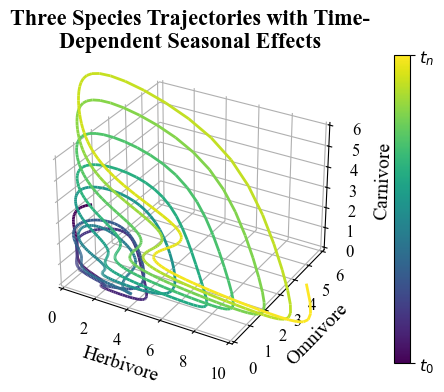

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.colors import Normalize

# Create a linearly spaced array for the color gradient
t = np.linspace(0, 48, sol.shape[0])

# Create line segments
segments = []
for i in range(0, sol.shape[0] - 1):
    segments.append(np.array([sol[i], sol[i + 1]]))


# Create a normalization instance
norm = Normalize(0, 48)

# Create a Line3DCollection from the segments and apply a colormap
lc = Line3DCollection(segments, cmap='viridis', norm=norm)
lc.set_array(t)
lc.set_linewidth(2)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.add_collection(lc)
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.set_zlim(0, 6)
ax.set_title("Three Species Trajectories with Time-\nDependent Seasonal Effects")
ax.set_xlabel("Herbivore")
ax.set_ylabel("Omnivore")
ax.set_zlabel("Carnivore")

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Add colorbar
cbar = fig.colorbar(lc, ax=ax, pad=0.1)
cbar.set_ticks([0, 48])
cbar.set_ticklabels(["$t_0$", "$t_n$"])

# Save the plot to a file
plt.savefig("trajectories/three_species_seasonal_cc.pdf")

